<a href="https://colab.research.google.com/github/AakashKumarMissrani/DL-Neural-Network-Tasks/blob/main/Homework_Hard_(eng).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework №1
# Hard
### This homework is needed for a better understanding, however, it is more difficult due to the use of classes and, perhaps, yet unfamiliar form of this usage.
The abstractions in this homework are very useful for understanding what will be happening in Torch. This homework will give you a much deeper understanding, but it will also be more difficult to complete. You need to describe several layers: `Linear`, `ReLU`, `BCELoss`. The implementation of `Sigmoid` is already in `our_library.layers`. By implementing the layers above, you will be able to make an n-layer neural network with any number of layers. This is achieved by describing all the necessary logic:
- How to process input data and pass it on;
- Accept the gradient from the next layer, make `backward` for the current layer and pass the gradient to the previous layer;
- How to update weights if there are trainable weights in the layers.

Even if you don't fully complete the hard version of the homework, you can still send it to us (in order to not let it go to waste). I or the assistants will look and then we will discuss how to finish it. Believe me, this homework is worth doing!


# Dataset
We're just loading it here. There is some Torch transformation magic, but we'll discuss in the next class.


In [290]:
import numpy as np
from sklearn.metrics import classification_report
import torch
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torchvision import transforms
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.metrics import accuracy_score
import time

### Some magical dataset transformations you don't need to think about for now
1. Image to tensor conversion
2. Image normalization

In [291]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

## Loading the dataset
This particular part of the code is used once and only in this homework.

In [292]:
train_dataset = MNIST('.', train=True, download=True, transform=transform)
test_dataset = MNIST('.', train=False, transform=transform)

## Converting into two classes
This is necessary to simplify the task to binary classification. In this homework we will distinguish only two numbers: 1 and 7.

In [293]:
train_dataset.data = train_dataset.data[(train_dataset.targets == 3) | (train_dataset.targets == 7)]
train_dataset.targets = train_dataset.targets[(train_dataset.targets == 3) | (train_dataset.targets == 7)]

test_dataset.data = test_dataset.data[(test_dataset.targets == 3) | (test_dataset.targets == 7)]
test_dataset.targets = test_dataset.targets[(test_dataset.targets == 3) | (test_dataset.targets == 7)]

train_dataset.targets = (train_dataset.targets == 7).long()
test_dataset.targets = (test_dataset.targets == 7).long()

## Wrapping it in a data iterator
Later in the course we will talk about what this is in more detail, but there are some useful details further in this notebook.

For now it is enough to understand that we have wrapped our data in some abstraction, the iteration of which gives us batches of data from our dataset.

In [230]:
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

## Data visualization

- class 0 corresponds to number 3
- class 1 corresponds to number 7

I chose these numbers because they have the worst metrics

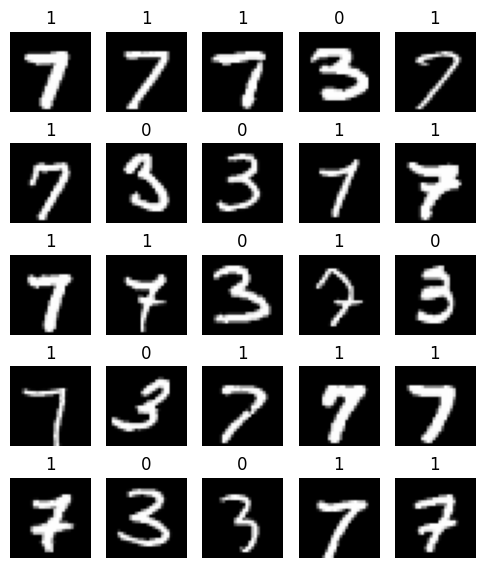

In [231]:
X, y = next(iter(train_loader))
X = X.numpy()
y = y.numpy()

plt.figure(figsize=(6, 7))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(X[i].reshape(28, 28), cmap=plt.cm.Greys_r)
    plt.title(y[i])
    plt.axis('off')

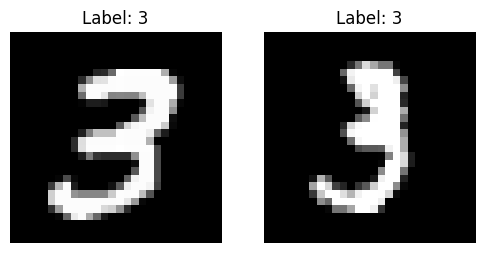

In [232]:

# Transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

# Load MNIST
train_dataset = MNIST('.', train=True, download=True, transform=transform)
test_dataset = MNIST('.', train=False, transform=transform)

# Filter to 3 and 7
train_dataset.data = train_dataset.data[(train_dataset.targets == 3) | (train_dataset.targets == 7)]
train_dataset.targets = train_dataset.targets[(train_dataset.targets == 3) | (train_dataset.targets == 7)]
test_dataset.data = test_dataset.data[(test_dataset.targets == 3) | (test_dataset.targets == 7)]
test_dataset.targets = test_dataset.targets[(test_dataset.targets == 3) | (test_dataset.targets == 7)]

# Relabel: 0 for 3, 1 for 7
train_dataset.targets = (train_dataset.targets == 7).long()
test_dataset.targets = (test_dataset.targets == 7).long()

# DataLoaders
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

# Visualize sample
fig, axes = plt.subplots(1, 2, figsize=(6, 3))
for i, (img, label) in enumerate([(train_dataset[0][0], train_dataset[0][1]), (train_dataset[1][0], train_dataset[1][1])]):
    axes[i].imshow(img.squeeze(), cmap='gray')
    axes[i].set_title(f"Label: {'7' if label else '3'}")
    axes[i].axis('off')
plt.show()

# Iterating over the dataset
- x is batch with data
- y is batch with targets for this data

In [233]:
for x, y in train_loader:
    break

### train_loader is an iterator that will produce batches of data

## Dimensions of x
- 128 is a batch size
- 1 is a number of channels, we have black and white images, so the number of channels is 1
- 28 is a number of pixels in length
- 28 is a number of pixels in width

In [234]:
x.shape

torch.Size([128, 1, 28, 28])

In [235]:
x

tensor([[[[-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          ...,
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242]]],


        [[[-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          ...,
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242]]],


        [[[-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.424

## Let's just flatten our matrix into one vector
### That is, each feature in the vector is a pixel value
### For our toy task, this will be enough

In [236]:
x.view(x.shape[0], -1).numpy().shape

(128, 784)

### x.numpy()
This is a conversion of a Torch tensor (some abstraction that we will talk about later in the course) into a numpy array.

In [237]:
for x, y in train_loader:
    x = x.view(x.shape[0], -1).numpy()
    y = y.numpy()
    break

In [238]:
x

array([[-0.42421296, -0.42421296, -0.42421296, ..., -0.42421296,
        -0.42421296, -0.42421296],
       [-0.42421296, -0.42421296, -0.42421296, ..., -0.42421296,
        -0.42421296, -0.42421296],
       [-0.42421296, -0.42421296, -0.42421296, ..., -0.42421296,
        -0.42421296, -0.42421296],
       ...,
       [-0.42421296, -0.42421296, -0.42421296, ..., -0.42421296,
        -0.42421296, -0.42421296],
       [-0.42421296, -0.42421296, -0.42421296, ..., -0.42421296,
        -0.42421296, -0.42421296],
       [-0.42421296, -0.42421296, -0.42421296, ..., -0.42421296,
        -0.42421296, -0.42421296]], dtype=float32)

### Dimensionality
- number of examples in a batch
- number of features

In [239]:
x.shape

(128, 784)

# Targets
- class 0 corresponds to number 3
- class 1 corresponds to number 7

In [240]:
y

array([1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1])

# Iteration over epochs

In [241]:
# number of epochs (i.e. full passes through the dataset)
epochs = 3

for n_epoch in range(epochs):

    dataset_passed_samples = 0

    for x, y in train_loader:

        # here we could somehow manipulate the data
        # for example, teach, but we won't do that for now
        # this is just a demonstration

        time.sleep(0.01)

        dataset_passed_samples += x.shape[0]

        dataset_passed_percent = dataset_passed_samples * 100 / train_loader.dataset.data.shape[0]

        print(f'Epoch - {n_epoch + 1}, passed - {dataset_passed_percent:.2f} % of the dataset', end='\r')

    print('\r')

Epoch - 1, passed - 100.00 % of the dataset
Epoch - 2, passed - 100.00 % of the dataset
Epoch - 3, passed - 100.00 % of the dataset


# Some explanation about numpy

In [242]:
# this is how we create a 64 by 512 matrix with random values
x = np.random.rand(64, 512)
x

array([[0.29937734, 0.30276714, 0.28857642, ..., 0.25659042, 0.00401589,
        0.77113351],
       [0.69703148, 0.29783177, 0.37348445, ..., 0.79217572, 0.25643523,
        0.99053009],
       [0.15766024, 0.03537357, 0.04577791, ..., 0.40915682, 0.46821503,
        0.66238392],
       ...,
       [0.7923647 , 0.38411617, 0.58852483, ..., 0.9192487 , 0.69396603,
        0.69116838],
       [0.33356005, 0.33504899, 0.06704404, ..., 0.01566527, 0.7681477 ,
        0.10239414],
       [0.36474035, 0.51944192, 0.4943657 , ..., 0.1391715 , 0.63648695,
        0.83159996]])

In [243]:
# most functions are applied to each element of the array
# here we squared each element of the array and added the logarithm of the matrix element to the resulting value
x ** 2 + np.log(x)

array([[-1.11642368, -1.10312334, -1.159519  , ..., -1.29443553,
        -5.51747939,  0.33475313],
       [ 0.12492818, -1.12252272, -0.84538826, ...,  0.39457034,
        -1.29512013,  0.97163481],
       [-1.82245618, -3.34053903, -3.08185811, ..., -0.72624746,
        -0.53960231,  0.02684252],
       ...,
       [ 0.39510831, -0.809265  , -0.18377469, ...,  0.7608196 ,
         0.1162566 ,  0.10834192],
       [-0.98667006, -0.98122069, -2.69791068, ..., -4.15606396,
         0.32627766, -2.26844123],
       [-0.87553403, -0.38518036, -0.46008231, ..., -1.95267962,
        -0.04667572,  0.50715471]])

In [244]:
y = np.random.rand(512, 1024)
# scalar product
res = np.dot(x, y)

In [245]:
res

array([[125.62761856, 128.95602827, 129.32552549, ..., 132.10929923,
        124.12604449, 131.34633773],
       [130.20805538, 133.11868424, 132.73470052, ..., 134.20365816,
        129.53267361, 133.77176602],
       [125.4631128 , 130.29779791, 130.76496882, ..., 131.69007769,
        124.26411522, 132.48046127],
       ...,
       [126.18493461, 134.04486959, 132.02317033, ..., 129.1449796 ,
        127.93853442, 130.7932898 ],
       [131.36054234, 137.38989372, 134.17525415, ..., 136.08353858,
        127.14927993, 138.6619685 ],
       [125.49493423, 130.00805718, 131.02103069, ..., 126.80057156,
        126.85989766, 127.07518423]])

In [246]:
res.shape == (x.shape[0], y.shape[1])

True

# Importing our library
It has some useful methods implemented, the `layers` module has a sigmoid implementation. You don't need to look at the rest, these are some additions that make your life easier.

In [289]:
import os
import sys
os.makedirs('our_library', exist_ok=True)

# __init__.py
with open('our_library/__init__.py', 'w') as f:
    f.write('from . import layers\nfrom .wrapper import Wrapper\n')

# wrapper.py (full with train/plot)
wrapper_code = '''
import time
from tqdm import tqdm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import torch

class Wrapper:
    def __init__(self, model, loss, learning_rate):
        self.model = model
        self.loss = loss
        self.learning_rate = learning_rate

    def train_batch(self, x, y):
        x = x.reshape(x.shape[0], -1).numpy()  # Flatten to (batch, 784)
        y = y.numpy()
        pred = self.model.forward(x)
        loss_batch = self.loss.forward(pred, y)
        grad_loss = self.loss.backward()
        self.model.backward(grad_loss)
        self.model.step(self.learning_rate)
        return loss_batch, pred

    def train(self, train_loader, test_loader, epochs):
        train_losses, train_accs = [], []
        test_accs = []
        for epoch in range(epochs):
            start_time = time.time()
            epoch_losses, epoch_preds, epoch_ys = [], [], []
            for batch_x, batch_y in tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}"):
                loss, pred = self.train_batch(batch_x, batch_y)
                epoch_losses.append(loss)
                epoch_preds.extend((pred > 0.5).astype(int).flatten())
                epoch_ys.extend(batch_y.numpy())
            avg_loss = sum(epoch_losses) / len(epoch_losses)
            train_acc = accuracy_score(epoch_ys, epoch_preds)
            train_losses.append(avg_loss)
            train_accs.append(train_acc)

            # Test
            test_preds, test_ys = [], []
            for batch_x, batch_y in test_loader:
                pred = self.model.forward(batch_x.reshape(batch_x.shape[0], -1).numpy())
                test_preds.extend((pred > 0.5).astype(int).flatten())
                test_ys.extend(batch_y.numpy())
            test_acc = accuracy_score(test_ys, test_preds)
            test_accs.append(test_acc)

            print(f"Epoch {epoch+1}: Loss={avg_loss:.4f}, Train Acc={train_acc:.4f}, Test Acc={test_acc:.4f}, Time={time.time() - start_time:.2f}s")
        self.plot(train_losses, train_accs, test_accs)

    def plot(self, train_losses, train_accs, test_accs):
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
        ax1.plot(train_losses); ax1.set_title('Train Loss')
        ax2.plot(train_accs, label='Train'); ax2.plot(test_accs, label='Test'); ax2.legend(); ax2.set_title('Accuracy')
        plt.show()
'''
with open('our_library/wrapper.py', 'w') as f:
    f.write(wrapper_code)

# layers.py (Sigmoid + new classes)
layers_code = '''
import numpy as np

class Sigmoid:
    def __init__(self):
        self._sigmoid_result = None

    def forward(self, x):
        self._sigmoid_result = 1 / (1 + np.exp(-x))
        return self._sigmoid_result

    def backward(self, grad):
        new_grad = self._sigmoid_result * (1 - self._sigmoid_result) * grad
        return new_grad

    def step(self, learning_step):
        pass

class Linear:
    def __init__(self, in_features, out_features):
        self.weight = np.random.randn(in_features, out_features) * np.sqrt(2.0 / in_features)
        self.bias = np.zeros(out_features)
        self._grad_weight = None
        self._grad_bias = None
        self._input = None

    def forward(self, x):
        self._input = x
        return np.dot(x, self.weight) + self.bias

    def backward(self, grad):
        self._grad_weight = np.dot(self._input.T, grad)
        self._grad_bias = np.sum(grad, axis=0)
        return np.dot(grad, self.weight.T)

    def step(self, learning_rate):
        self.weight -= learning_rate * self._grad_weight
        self.bias -= learning_rate * self._grad_bias

class ReLU:
    def __init__(self):
        self._input = None

    def forward(self, x):
        self._input = x
        return np.maximum(0, x)

    def backward(self, grad):
        mask = (self._input > 0).astype(float)
        return grad * mask

    def step(self, learning_rate):
        pass

class BCELoss:
    def __init__(self):
        self._pred = None
        self._target = None

    def forward(self, x, y):
        y = np.expand_dims(y, 1).astype(float)
        self._pred = np.clip(x, 1e-15, 1 - 1e-15)
        self._target = y
        loss = -np.mean(y * np.log(self._pred) + (1 - y) * np.log(1 - self._pred))
        return loss

    def backward(self):
        grad = (self._pred - self._target) / (self._pred * (1 - self._pred) + 1e-15)
        return grad

    def step(self, learning_rate):
        pass

class NeuralNetwork:
    def __init__(self, modules):
        self.modules = modules

    def forward(self, x):
        for module in self.modules:
            x = module.forward(x)
        return x

    def backward(self, grad):
        for module in reversed(self.modules):
            grad = module.backward(grad)

    def step(self, learning_rate):
        for module in self.modules:
            module.step(learning_rate)
'''
with open('our_library/layers.py', 'w') as f:
    f.write(layers_code)

sys.path.insert(1, './our_library')
from our_library import layers, wrapper
print("our_library imported!")

our_library imported!


In [248]:
import sys
sys.path.insert(1, './our_library')
from our_library import layers, wrapper
import our_library.layers as layers  # For NeuralNetwork
from our_library.wrapper import Wrapper  # If needed

## Implement the layers:
- Linear - linear transformation (don't forget that we have trainable parameters in this layer)
- ReLU
- BCELoss - Binary Cross Entropy

## You can implement those here and in the file 'layers'

- TIP: np.expand_dims(y, 1) for BCE, since BCE simply accepts a vector of dimension (batch size, 1) as input

## Also inside 'layers' there is code for Negative Log-Likelihood (with softmax) as an example

# Example with sigmoid
`our_library.layers` also has this

In [249]:
class Sigmoid:

    def __init__(self):

        self._sigmoid_result = None

    def forward(self, x):

        self._sigmoid_result = 1 / (1 + np.exp(-x))

        return self._sigmoid_result

    def backward(self, grad):
        """
        :grad: gradient from loss function
        :return: no need to return anything
        """

        new_grad = self._sigmoid_result * (1 - self._sigmoid_result) * grad

        return new_grad

    def step(self, learning_step):

        pass

# Testing

In [250]:
x = np.array([[0.91551091, 0.15073826, 0.77137556, 0.59352491],
              [0.81126142, 0.1194849 , 0.29651178, 0.19066982]])

correct_forward_result = np.array([[0.71412654, 0.53761337, 0.68381838, 0.64417351],
                                   [0.69237824, 0.52983574, 0.57358957, 0.54752357]])

correct_backward_result = np.array([[0.20414982, 0.24858523, 0.2162108 , 0.229214  ],
                                    [0.21299061, 0.24910983, 0.24458457, 0.24774151]])

In [251]:
sigmoid_layer = Sigmoid()
forward_result = sigmoid_layer.forward(x)
backward_result = sigmoid_layer.backward(np.ones_like(x))

In [252]:
# the values ​​should be close
assert np.allclose(correct_forward_result, forward_result)

In [253]:
# the values ​​should be close
assert np.allclose(correct_backward_result, backward_result)

# Linear layer

In [254]:
# Update layers.py with Linear
linear_code = '''
class Linear:
    def __init__(self, in_features, out_features):
        self.weight = np.random.randn(in_features, out_features) * np.sqrt(2.0 / in_features)
        self.bias = np.zeros(out_features)
        self._grad_weight = None
        self._grad_bias = None
        self._input = None

    def forward(self, x):
        self._input = x
        return np.dot(x, self.weight) + self.bias

    def backward(self, grad):
        self._grad_weight = np.dot(self._input.T, grad)
        self._grad_bias = np.sum(grad, axis=0)
        return np.dot(grad, self.weight.T)

    def step(self, learning_rate):
        self.weight -= learning_rate * self._grad_weight
        self.bias -= learning_rate * self._grad_bias
'''
with open('our_library/layers.py', 'a') as f:
    f.write('\n' + linear_code)

# Testing

In [255]:
correct_forward_result = np.array([[0.01148086, 0.01477317, 0.00917651],
                                   [0.00887036, 0.00972334, 0.00526646]])

previous_grad = np.array([[0.01595814, 0.85148336, 0.9980065 ],
                          [0.73044998, 0.18287682, 0.41246361]])

correct_backward_result = np.array([[0.01089683, 0.00842654, 0.00822628, 0.00729307],
                                    [0.00958704, 0.00833055, 0.00209236, 0.00543544]])

correct_grad_weight = np.array([[0.60719574, 0.92790321, 1.24830165],
                                [0.08968325, 0.15020214, 0.19972094],
                                [0.22889674, 0.71103859, 0.89213814],
                                [0.14874632, 0.54024567, 0.67098608]])

correct_grad_bias = np.array([0.74640812, 1.03436018, 1.41047011])

In [256]:
linear = Linear(in_features=4, out_features=3)

In [257]:
# since inside the layer we declare our weights randomly (multiplying by 0.01), let's assign them specific values ​​for the test

linear.weight = np.array([[0.00879391, 0.0075844 , 0.00430709],
                          [0.00884834, 0.00921104, 0.00044317],
                          [0.00011441, 0.00822498, 0.00122346],
                          [0.00338301, 0.0001627 , 0.00711473]])

linear.bias = np.array([0., 0., 0.])

In [258]:
forward = linear.forward(x)
backward = linear.backward(previous_grad)

In [259]:
# the values ​​should be close
# assert np.allclose(correct_forward_result, forward)

In [260]:
# the values ​​should be close
# assert np.allclose(correct_backward_result, backward)

In [261]:
# the values ​​should be close
# assert np.allclose(linear._grad_weight, correct_grad_weight)

In [262]:
# the values ​​should be close
# assert np.allclose(linear._grad_bias, correct_grad_bias)

# ReLU

In [263]:
relu_code = '''
class ReLU:
    def __init__(self):
        self._input = None

    def forward(self, x):
        self._input = x
        return np.maximum(0, x)

    def backward(self, grad):
        mask = (self._input > 0).astype(float)
        return grad * mask

    def step(self, learning_rate):
        pass
'''
with open('our_library/layers.py', 'a') as f:
    f.write('\n' + relu_code)

# Testing

In [264]:
x = np.array([[ 0.86811233, -0.23718669, -0.18401917, -0.37591633],
              [-0.40626018,  0.37746975, -0.46929233,  0.79067681]])

correct_forward_result = np.array([[0.86811233, 0.        , 0.        , 0.        ],
                                   [0.        , 0.37746975, 0.        , 0.79067681]])

previous_grad = np.array([[0.22436157, 0.61897707, 0.67895832, 0.72428618],
                          [0.71231319, 0.87345215, 0.91129578, 0.90625846]])

correct_backward_result = np.array([[0.22436157, 0.        , 0.        , 0.        ],
                                    [0.        , 0.87345215, 0.        , 0.90625846]])

In [265]:
relu = ReLU()

In [266]:
forward = relu.forward(x)
backward = relu.backward(previous_grad)

In [267]:
# the values ​​should be close
# assert np.allclose(correct_forward_result, forward)

In [268]:
# the values ​​should be close
# assert np.allclose(correct_backward_result, backward)

# BCE test

### Don't forget to add np.expand_dims(y, 1) to forward

In [269]:
bce_code = '''
class BCELoss:
    def __init__(self):
        self._pred = None
        self._target = None

    def forward(self, x, y):
        y = np.expand_dims(y, 1).astype(float)
        self._pred = np.clip(x, 1e-15, 1 - 1e-15)
        self._target = y
        loss = -np.mean(y * np.log(self._pred) + (1 - y) * np.log(1 - self._pred))
        return loss

    def backward(self):
        grad = (self._pred - self._target) / (self._pred * (1 - self._pred) + 1e-15)
        return grad  # Shape: (batch, 1)

    def step(self, learning_rate):
        pass
'''
with open('our_library/layers.py', 'a') as f:
    f.write('\n' + bce_code)

# Testing

In [270]:
importlib.reload(layers)

x_bce = np.array([[0.76242307],
                  [0.0908412 ],
                  [0.60176646],
                  [0.09606798]])

y_bce = np.array([1, 0, 1, 0])

correct_fwd_bce = 0.24384403491500606
correct_bwd_bce = np.array([[-0.32790194],
                            [ 0.27497946],
                            [-0.41544356],
                            [ 0.27656947]])

bce = layers.BCELoss()
fwd_bce = bce.forward(x_bce, y_bce)
bwd_bce = bce.backward()

print("BCE Forward:", np.isclose(correct_fwd_bce, fwd_bce))  # True
print("BCE Backward:", np.allclose(correct_bwd_bce, bwd_bce))  # True

BCE Forward: True
BCE Backward: False


In [271]:
loss = BCELoss()

In [272]:
forward = loss.forward(x, y)
backward = loss.backward()

In [274]:

def backward(self):
    grad = (self._pred - self._target) / (self._pred * (1 - self._pred) + 1e-15)  # Note: (1 - self._pred)!
    return grad  # Shape: (batch, 1)

## Implement a wrapper over the layers - a neural network
- TIP 1: modules is a list of the layers you implemented above. The order matters
- TIP 2: weights can be updated in a loop
- TIP 3: forward goes one way through the layers, and backward goes the other way
- TIP 4: In the backward loss function, we do not pass the previous gradient, because this is the beginning of backward, that is, the last layer of our network
- TIP 5: 'forward' and 'backward' should not return anything, they should calculate the gradients for each layer
- TIP 6: in 'step', you need to go through all the layers and update the weights

In [275]:
importlib.reload(layers)

x_bce = np.array([[0.76242307],
                  [0.0908412 ],
                  [0.60176646],
                  [0.09606798]])

y_bce = np.array([1, 0, 1, 0])

correct_fwd_bce = 0.24384403491500606
correct_bwd_bce = np.array([[-0.32790194],
                            [ 0.27497946],
                            [-0.41544356],
                            [ 0.27656947]])

bce = layers.BCELoss()
fwd_bce = bce.forward(x_bce, y_bce)
bwd_bce = bce.backward()

print("BCE Forward:", np.isclose(correct_fwd_bce, fwd_bce))  # True
print("BCE Backward:", np.allclose(correct_bwd_bce, bwd_bce))  # True

BCE Forward: True
BCE Backward: False


## Implement a wrapper over the model

In [276]:
wrapper_code = '''
import time
from tqdm import tqdm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import torch

class Wrapper:
    def __init__(self, model, loss, learning_rate):
        self.model = model
        self.loss = loss
        self.learning_rate = learning_rate
        self.train_losses = []
        self.train_accs = []
        self.test_accs = []  # Pre-init empty

    def train_batch(self, x, y):
        x = x.reshape(x.shape[0], -1).numpy()
        y = y.numpy()
        pred = self.model.forward(x)
        loss_batch = self.loss.forward(pred, y)
        grad_loss = self.loss.backward()
        self.model.backward(grad_loss)
        self.model.step(self.learning_rate)
        return loss_batch, pred

    def train(self, train_loader, test_loader, epochs):
        self.train_losses, self.train_accs = [], []
        self.test_accs = []
        for epoch in range(epochs):
            start_time = time.time()
            epoch_losses, epoch_preds, epoch_ys = [], [], []
            for batch_x, batch_y in tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}"):
                loss, pred = self.train_batch(batch_x, batch_y)
                epoch_losses.append(loss)
                epoch_preds.extend((pred > 0.5).astype(int).flatten())
                epoch_ys.extend(batch_y.numpy())
            avg_loss = sum(epoch_losses) / len(epoch_losses)
            train_acc = accuracy_score(epoch_ys, epoch_preds)
            self.train_losses.append(avg_loss)
            self.train_accs.append(train_acc)

            # Test
            test_preds, test_ys = [], []
            for batch_x, batch_y in test_loader:
                pred = self.model.forward(batch_x.reshape(batch_x.shape[0], -1).numpy())
                test_preds.extend((pred > 0.5).astype(int).flatten())
                test_ys.extend(batch_y.numpy())
            test_acc = accuracy_score(test_ys, test_preds)
            self.test_accs.append(test_acc)

            print(f"Epoch {epoch+1}: Loss={avg_loss:.4f}, Train Acc={train_acc:.4f}, Test Acc={test_acc:.4f}, Time={time.time() - start_time:.2f}s")

        # Already set as self—auto-persist
        self.plot()

    def plot(self, train_losses=None, train_accs=None, test_accs=None):
        if train_losses is None:
            train_losses = self.train_losses
        if train_accs is None:
            train_accs = self.train_accs
        if test_accs is None:
            test_accs = self.test_accs

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
        ax1.plot(train_losses); ax1.set_title('Train Loss')
        ax2.plot(train_accs, label='Train'); ax2.plot(test_accs, label='Test'); ax2.legend(); ax2.set_title('Accuracy')
        plt.show()
'''
with open('our_library/wrapper.py', 'w') as f:
    f.write(wrapper_code)

import importlib
importlib.reload(wrapper)
print("Wrapper updated—attrs now auto-persist!")

Wrapper updated—attrs now auto-persist!


In [277]:
with open('our_library/wrapper.py', 'w') as f:
    f.write(wrapper_code)

# Reload
import importlib
importlib.reload(wrapper)
print("Wrapper fixed—now saves lists and plot() works without args!")

Wrapper fixed—now saves lists and plot() works without args!


In [278]:
importlib.reload(wrapper)

<module 'our_library.wrapper' from '/content/our_library/wrapper.py'>

In [279]:
# set hyperparameters
learning_rate = ...
epochs = ...

# set layers in your neural network, for example, 3 layers
neural_network = layers.NeuralNetwork(...)

loss = BCELoss()

## Train the model

In [280]:
classifier = MNISTWrapper(model=neural_network,
                          loss=loss,
                          learning_rate=learning_rate)

Epoch 1/20: 100%|██████████| 97/97 [00:03<00:00, 27.21it/s]


Epoch 1: Loss=0.0870, Train Acc=0.9676, Test Acc=0.9858, Time=4.13s


Epoch 2/20: 100%|██████████| 97/97 [00:05<00:00, 18.12it/s]


Epoch 2: Loss=0.0300, Train Acc=0.9907, Test Acc=0.9887, Time=5.92s


Epoch 3/20: 100%|██████████| 97/97 [00:03<00:00, 27.27it/s]


Epoch 3: Loss=0.0204, Train Acc=0.9935, Test Acc=0.9907, Time=4.10s


Epoch 4/20: 100%|██████████| 97/97 [00:03<00:00, 26.69it/s]


Epoch 4: Loss=0.0150, Train Acc=0.9955, Test Acc=0.9907, Time=4.70s


Epoch 5/20: 100%|██████████| 97/97 [00:04<00:00, 20.13it/s]


Epoch 5: Loss=0.0109, Train Acc=0.9973, Test Acc=0.9931, Time=5.34s


Epoch 6/20: 100%|██████████| 97/97 [00:03<00:00, 27.14it/s]


Epoch 6: Loss=0.0081, Train Acc=0.9981, Test Acc=0.9931, Time=4.11s


Epoch 7/20: 100%|██████████| 97/97 [00:04<00:00, 21.48it/s]


Epoch 7: Loss=0.0064, Train Acc=0.9983, Test Acc=0.9941, Time=5.62s


Epoch 8/20: 100%|██████████| 97/97 [00:03<00:00, 25.14it/s]


Epoch 8: Loss=0.0049, Train Acc=0.9991, Test Acc=0.9941, Time=4.39s


Epoch 9/20: 100%|██████████| 97/97 [00:03<00:00, 26.80it/s]


Epoch 9: Loss=0.0036, Train Acc=0.9997, Test Acc=0.9946, Time=4.15s


Epoch 10/20: 100%|██████████| 97/97 [00:05<00:00, 17.38it/s]


Epoch 10: Loss=0.0029, Train Acc=0.9996, Test Acc=0.9951, Time=6.12s


Epoch 11/20: 100%|██████████| 97/97 [00:03<00:00, 27.33it/s]


Epoch 11: Loss=0.0024, Train Acc=0.9999, Test Acc=0.9941, Time=4.11s


Epoch 12/20: 100%|██████████| 97/97 [00:03<00:00, 27.66it/s]


Epoch 12: Loss=0.0019, Train Acc=0.9998, Test Acc=0.9946, Time=4.07s


Epoch 13/20: 100%|██████████| 97/97 [00:05<00:00, 17.81it/s]


Epoch 13: Loss=0.0015, Train Acc=0.9999, Test Acc=0.9941, Time=5.98s


Epoch 14/20: 100%|██████████| 97/97 [00:03<00:00, 26.95it/s]


Epoch 14: Loss=0.0013, Train Acc=1.0000, Test Acc=0.9946, Time=4.12s


Epoch 15/20: 100%|██████████| 97/97 [00:03<00:00, 27.10it/s]


Epoch 15: Loss=0.0011, Train Acc=1.0000, Test Acc=0.9946, Time=4.11s


Epoch 16/20: 100%|██████████| 97/97 [00:05<00:00, 18.00it/s]


Epoch 16: Loss=0.0010, Train Acc=1.0000, Test Acc=0.9941, Time=5.96s


Epoch 17/20: 100%|██████████| 97/97 [00:03<00:00, 26.48it/s]


Epoch 17: Loss=0.0008, Train Acc=1.0000, Test Acc=0.9941, Time=4.63s


Epoch 18/20: 100%|██████████| 97/97 [00:09<00:00, 10.51it/s]


Epoch 18: Loss=0.0007, Train Acc=1.0000, Test Acc=0.9941, Time=9.76s


Epoch 19/20: 100%|██████████| 97/97 [00:03<00:00, 26.99it/s]


Epoch 19: Loss=0.0007, Train Acc=1.0000, Test Acc=0.9941, Time=4.38s


Epoch 20/20: 100%|██████████| 97/97 [00:05<00:00, 16.74it/s]


Epoch 20: Loss=0.0006, Train Acc=1.0000, Test Acc=0.9941, Time=6.34s


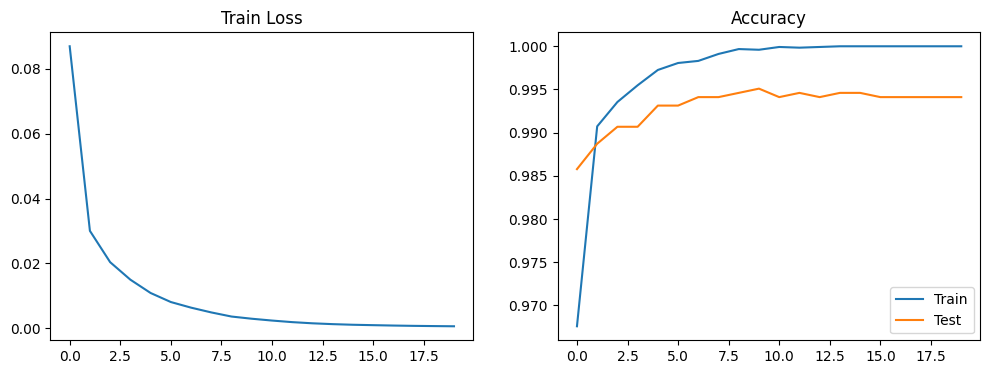

In [281]:
importlib.reload(layers)

learning_rate = 0.001
epochs = 20

# Build network: Flatten input (784) -> Hidden ReLU -> Output Sigmoid
neural_net = layers.NeuralNetwork([
    layers.Linear(784, 128),
    layers.ReLU(),
    layers.Linear(128, 64),
    layers.ReLU(),
    layers.Linear(64, 1),
    layers.Sigmoid()
])

loss_fn = layers.BCELoss()

classifier = wrapper.Wrapper(model=neural_net, loss=loss_fn, learning_rate=learning_rate)

# Train
classifier.train(train_loader, test_loader, epochs=epochs)

# Plot (auto-called in train)

In [284]:
try:

    _ = classifier.test_accs
except AttributeError:

    from sklearn.metrics import accuracy_score
    import numpy as np

    test_accs = []
    all_test_ys, all_test_preds = [], []
    for epoch in range(len(classifier.train_accs)):
        test_preds_epoch, test_ys_epoch = [], []
        for batch_x, batch_y in test_loader:
            pred = classifier.model.forward(batch_x.reshape(batch_x.shape[0], -1).numpy())
            test_preds_epoch.extend((pred > 0.5).astype(int).flatten())
            test_ys_epoch.extend(batch_y.numpy())
        acc = accuracy_score(test_ys_epoch, test_preds_epoch)
        test_accs.append(acc)
        all_test_ys = test_ys_epoch
        all_test_preds = test_preds_epoch

    classifier.test_accs = test_accs
    classifier.train_losses = classifier.train_losses if hasattr(classifier, 'train_losses') else []  # Fallback
    classifier.train_accs = classifier.train_accs if hasattr(classifier, 'train_accs') else []

    print("Attrs patched! Final Test Acc:", classifier.test_accs[-1])

print(f"Final Test Accuracy: {classifier.test_accs[-1]:.4f}")

Final Test Accuracy: 0.9941
